In [25]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
plt.rc("font", size= 14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style= "white", color_codes = True)

وارد کردن دیتاست و آشنایی با ساختار اولیه آن

In [26]:
data = pd.read_csv('C:\\Users\\ShahinN\\Desktop\\banking.txt')
data = data.dropna()
print(data.shape)
print(list(data.columns))

(41188, 21)
['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'y']


In [27]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


In [28]:
data['education'].unique()

array(['basic.4y', 'unknown', 'university.degree', 'high.school',
       'basic.9y', 'professional.course', 'basic.6y', 'illiterate'],
      dtype=object)

In [29]:
data['education']= np.where(data['education'] == 'basic.4y', 'Basic', data['education'])
data['education']= np.where(data['education'] == 'basic.6y', 'Basic', data['education'])
data['education']= np.where(data['education'] == 'basic.9y', 'Basic', data['education'])

In [30]:
data['education'].unique()

array(['Basic', 'unknown', 'university.degree', 'high.school',
       'professional.course', 'illiterate'], dtype=object)

In [7]:
data['y'].value_counts()

0    36548
1     4640
Name: y, dtype: int64

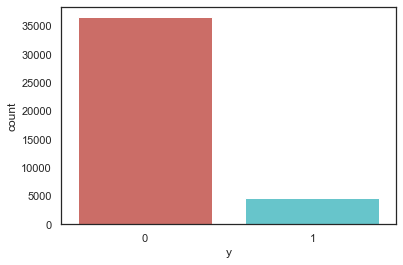

In [8]:
sns.countplot(x= 'y', data=data, palette = 'hls')
plt.show()

In [9]:
count_no_sub = len(data[data['y'] == 0])
count_sub = len(data[data['y'] == 1])
pct_of_no_sub = count_no_sub / (count_no_sub + count_sub)
print("percentage of non-subscribed ppl:", pct_of_no_sub)
pct_of_sub = count_sub / (count_no_sub + count_sub)
print("percentage of subscribed ppl:", pct_of_sub)

percentage of non-subscribed ppl: 0.8873458288821987
percentage of subscribed ppl: 0.11265417111780131


In [10]:
data.describe()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911,0.112654
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528,0.316173
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


In [11]:
data.groupby('y').mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
y,,,,,,,,,,
0,39.911185,220.844807,2.633085,984.113878,0.132374,0.248875,93.603757,-40.593097,3.811491,5176.166600
1,40.913147,553.191164,2.051724,792.035560,0.492672,-1.233448,93.354386,-39.789784,2.123135,5095.115991


In [12]:
data.groupby('job').mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
job,,,,,,,,,,,
admin.,38.187296,254.312128,2.623489,954.319229,0.189023,0.015563,93.534054,-40.245433,3.550274,5164.125350,0.129726
blue-collar,39.555760,264.542360,2.558461,985.160363,0.122542,0.248995,93.656656,-41.375816,3.771996,5175.615150,0.068943
entrepreneur,41.723214,263.267857,2.535714,981.267170,0.138736,0.158723,93.605372,-41.283654,3.791120,5176.313530,0.085165
housemaid,45.500000,250.454717,2.639623,960.579245,0.137736,0.433396,93.676576,-39.495283,4.009645,5179.529623,0.100000
management,42.362859,257.058140,2.476060,962.647059,0.185021,-0.012688,93.522755,-40.489466,3.611316,5166.650513,0.112175
retired,62.027326,273.712209,2.476744,897.936047,0.327326,-0.698314,93.430786,-38.573081,2.770066,5122.262151,0.252326
self-employed,39.949331,264.142153,2.660802,976.621393,0.143561,0.094159,93.559982,-40.488107,3.689376,5170.674384,0.104856
services,37.926430,258.398085,2.587805,979.974049,0.154951,0.175359,93.634659,-41.290048,3.699187,5171.600126,0.081381
student,25.894857,283.683429,2.104000,840.217143,0.524571,-1.408000,93.331613,-40.187543,1.884224,5085.939086,0.314286


In [13]:
%matplotlib inline

Text(0, 0.5, 'frequency of purchase')

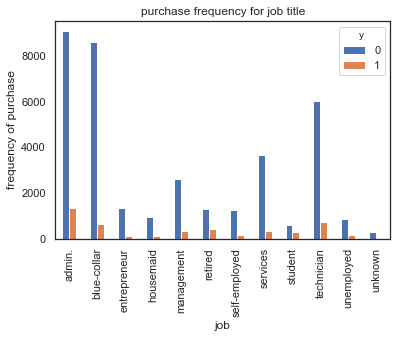

In [14]:
pd.crosstab(data.job, data.y).plot(kind = 'bar')
plt.title('purchase frequency for job title')
plt.xlabel('job')
plt.ylabel('frequency of purchase')

Text(0, 0.5, 'Proportion of customers')

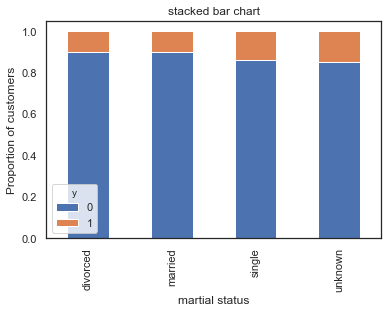

In [17]:
table= pd.crosstab(data.marital, data.y)
table.div(table.sum(1).astype('float'), axis=0).plot(kind= 'bar', stacked=True)
plt.title('stacked bar chart')
plt.xlabel('martial status')
plt.ylabel('Proportion of customers')

In [31]:
subscribed = data[data['y'] == 1].sample(n= 4640)
non_subscribed = data[data['y'] == 0].sample(n= 4640)

In [32]:
subscribed.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
35060,40,admin.,married,university.degree,no,no,yes,cellular,apr,thu,...,1,999,0,nonexistent,-1.8,93.075,-47.1,1.365,5099.1,1
31837,45,management,married,university.degree,no,yes,no,cellular,jul,thu,...,2,6,2,success,-1.7,94.215,-40.3,0.884,4991.6,1
3181,32,technician,divorced,professional.course,no,yes,no,cellular,mar,tue,...,2,999,0,nonexistent,-1.8,92.843,-50.0,1.556,5099.1,1
35497,49,admin.,single,high.school,no,yes,no,cellular,oct,fri,...,2,999,0,nonexistent,-3.4,92.431,-26.9,0.739,5017.5,1
3707,30,services,single,high.school,no,no,no,cellular,may,mon,...,3,999,0,nonexistent,-1.8,92.893,-46.2,1.244,5099.1,1


In [33]:
new_dataset = subscribed.append(non_subscribed)

In [34]:
new_dataset

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
35060,40,admin.,married,university.degree,no,no,yes,cellular,apr,thu,...,1,999,0,nonexistent,-1.8,93.075,-47.1,1.365,5099.1,1
31837,45,management,married,university.degree,no,yes,no,cellular,jul,thu,...,2,6,2,success,-1.7,94.215,-40.3,0.884,4991.6,1
3181,32,technician,divorced,professional.course,no,yes,no,cellular,mar,tue,...,2,999,0,nonexistent,-1.8,92.843,-50.0,1.556,5099.1,1
35497,49,admin.,single,high.school,no,yes,no,cellular,oct,fri,...,2,999,0,nonexistent,-3.4,92.431,-26.9,0.739,5017.5,1
3707,30,services,single,high.school,no,no,no,cellular,may,mon,...,3,999,0,nonexistent,-1.8,92.893,-46.2,1.244,5099.1,1
2090,30,admin.,married,university.degree,no,yes,no,cellular,apr,thu,...,1,999,1,failure,-1.8,93.075,-47.1,1.365,5099.1,1
13318,72,retired,married,Basic,no,no,no,cellular,sep,fri,...,1,3,2,success,-3.4,92.379,-29.8,0.803,5017.5,1
35046,29,admin.,single,university.degree,no,no,no,cellular,jun,tue,...,2,999,0,nonexistent,-2.9,92.963,-40.8,1.286,5076.2,1
18321,60,blue-collar,married,Basic,no,yes,no,cellular,may,mon,...,2,6,2,success,-1.8,93.876,-40.0,0.685,5008.7,1
6742,27,student,single,Basic,no,yes,yes,cellular,jun,tue,...,1,999,0,nonexistent,-2.9,92.963,-40.8,1.262,5076.2,1


In [35]:
new_dataset.shape

(9280, 21)

# create dummy variables

In [36]:
# get dummies
data = pd.get_dummies(new_dataset[['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']])
data.head()

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
35060,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
31837,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3181,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,1,0
35497,1,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,1,0
3707,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0


In [37]:
new_dataset.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
35060,40,admin.,married,university.degree,no,no,yes,cellular,apr,thu,...,1,999,0,nonexistent,-1.8,93.075,-47.1,1.365,5099.1,1
31837,45,management,married,university.degree,no,yes,no,cellular,jul,thu,...,2,6,2,success,-1.7,94.215,-40.3,0.884,4991.6,1
3181,32,technician,divorced,professional.course,no,yes,no,cellular,mar,tue,...,2,999,0,nonexistent,-1.8,92.843,-50.0,1.556,5099.1,1
35497,49,admin.,single,high.school,no,yes,no,cellular,oct,fri,...,2,999,0,nonexistent,-3.4,92.431,-26.9,0.739,5017.5,1
3707,30,services,single,high.school,no,no,no,cellular,may,mon,...,3,999,0,nonexistent,-1.8,92.893,-46.2,1.244,5099.1,1


In [38]:
new_dataset.drop(['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome'], axis=1, inplace=True)

In [39]:
new_dataset.head()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
35060,40,499,1,999,0,-1.8,93.075,-47.1,1.365,5099.1,1
31837,45,138,2,6,2,-1.7,94.215,-40.3,0.884,4991.6,1
3181,32,144,2,999,0,-1.8,92.843,-50.0,1.556,5099.1,1
35497,49,136,2,999,0,-3.4,92.431,-26.9,0.739,5017.5,1
3707,30,700,3,999,0,-1.8,92.893,-46.2,1.244,5099.1,1


In [40]:
data_final = new_dataset.join(data)
data_final.head()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
35060,40,499,1,999,0,-1.8,93.075,-47.1,1.365,5099.1,...,0,0,0,0,1,0,0,0,1,0
31837,45,138,2,6,2,-1.7,94.215,-40.3,0.884,4991.6,...,0,0,0,0,1,0,0,0,0,1
3181,32,144,2,999,0,-1.8,92.843,-50.0,1.556,5099.1,...,0,0,0,0,0,1,0,0,1,0
35497,49,136,2,999,0,-3.4,92.431,-26.9,0.739,5017.5,...,1,0,1,0,0,0,0,0,1,0
3707,30,700,3,999,0,-1.8,92.893,-46.2,1.244,5099.1,...,0,0,0,1,0,0,0,0,1,0


In [41]:
y = ['y']
X = [i for i in data_final if i not in y]

In [42]:
from sklearn import datasets
from sklearn.feature_selection import RFE
logreg = LogisticRegression()
rfe = RFE(logreg, 18)
rfe = rfe.fit(data_final[X], data_final[y])
print(rfe.support_)
print(rfe.ranking_)


C:\Users\ShahinN\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ShahinN\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ShahinN\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ShahinN\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ShahinN\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default sol

C:\Users\ShahinN\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ShahinN\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ShahinN\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ShahinN\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ShahinN\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to

[False False False False  True False False False  True False False False
 False False False  True False False  True False False  True False False
 False False False False False False False False  True  True False False
 False False False False False  True  True  True False  True False False
  True  True  True  True  True False False False False False  True False
  True]
[44 39 23 43  1 18 20 33  1 32 31 11 28 30 26  1 13 34  1 25 14  1  7 38
 17 22 36 24 41 27  6 29  1  1 42 16 21 40 35 10 37  1  1  1  5  1 12  4
  1  1  1  1  1  8 19  9  3  2  1 15  1]


In [43]:
print(list(data_final.columns))

['age', 'duration', 'campaign', 'pdays', 'previous', 'emp_var_rate', 'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'y', 'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired', 'job_self-employed', 'job_services', 'job_student', 'job_technician', 'job_unemployed', 'job_unknown', 'marital_divorced', 'marital_married', 'marital_single', 'marital_unknown', 'education_Basic', 'education_high.school', 'education_illiterate', 'education_professional.course', 'education_university.degree', 'education_unknown', 'default_no', 'default_unknown', 'default_yes', 'housing_no', 'housing_unknown', 'housing_yes', 'loan_no', 'loan_unknown', 'loan_yes', 'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep', 'day_of_week_fri', 'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue', 'day_of_week_wed', 'poutcome_failure', 'poutco

In [44]:
cols=["previous", "euribor3m", "job_blue-collar", "job_retired", "job_services", "job_student", "default_no", 
      "month_aug", "month_dec", "month_jul", "month_nov", "month_oct", "month_sep", "day_of_week_fri", "day_of_week_wed", 
      "poutcome_failure", "poutcome_nonexistent", "poutcome_success"] 
X= data_final[cols]
y = data_final['y']

In [45]:
seed = 7
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state= seed)
y_train = y_train.ravel()

In [18]:
y_train

array([0, 1, 0, ..., 1, 0, 1], dtype=int64)

In [46]:
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB

In [47]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('SVM', SVC()))
models.append(('NB', GaussianNB()))
models.append(('LDA', LinearDiscriminantAnalysis()))

results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    Results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring= 'accuracy')
    results.append(Results)
    names.append(name)
    

C:\Users\ShahinN\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ShahinN\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ShahinN\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ShahinN\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ShahinN\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to

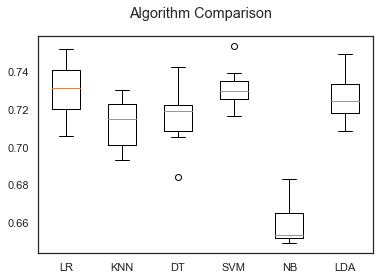

In [48]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [50]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print('Accuracy:', logreg.score(X_test, y_test))

Accuracy: 0.7183908045977011


C:\Users\ShahinN\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


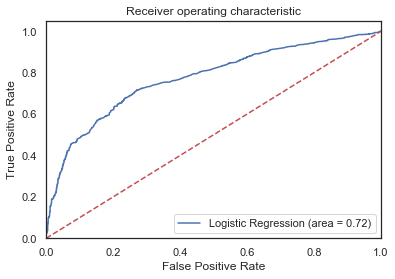

In [51]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()